In [20]:
"""from sentence_transformers import SentenceTransformer
from tqdm.auto import tqdm
tqdm.pandas()

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
df = pd.read_csv('dataset/cmu_merged_with_imdb.csv')
df['embeddings'] = df['PlotSummaries'].progress_apply(lambda x: model.encode(x))

df['embeddings'] = df['embeddings'].apply(lambda x: ','.join(map(str, x)))
df.to_csv('embeddings.csv', index=False)"""

  0%|          | 0/14950 [00:00<?, ?it/s]

In [ ]:
"""from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
queries = ['query 1', 'query 2', 'query 3']
query_embeddings = model.encode(queries)

embeddings = np.stack(df_cmu['embeddings'].values)
similarity_results = []
for query_emb in query_embeddings:
    similarities = cosine_similarity([query_emb], embeddings)
    similarity_results.append(similarities[0])"""

In [4]:
import plotly.graph_objs as go
import json

fig = go.Figure(data=[go.Bar(y=[1, 3, 2])])

fig_json = fig.to_json()

with open('figures/test.json', 'w') as json_file:
    json.dump(json.loads(fig_json), json_file, indent=4)


In [6]:
import pandas as pd

df_cmu = pd.read_csv("dataset/cmu_merged_with_imdb.csv")

def split_text_into_chunks(text, chunk_size=512):
    return [text[i:i+chunk_size] for i in range(0, len(text), chunk_size)]

chunks_data = {
    'film_id': [],
    'text_chunk': []
}
for index, row in df_cmu.iterrows():
    film_id = row['IMDbID'] 
    plot_summary = row['PlotSummaries']
    
    chunks = split_text_into_chunks(plot_summary, 512)
    
    for chunk in chunks:
        chunks_data['film_id'].append(film_id)
        chunks_data['text_chunk'].append(chunk)

df_chunks = pd.DataFrame(chunks_data)


In [7]:
df_chunks

,film_id,text_chunk
0,tt0228333,"Set in the second half of the 22nd century, th..."
1,tt0228333,"s being held, Ballard finds virtually all of t..."
2,tt0228333,"ghosts, if possible. Unfortunately, her intent..."
3,tt0228333,"events , leaving only her and Williams after ..."
4,tt0228333,"ll, attack the city. The end scene sets the mo..."
...,...,...
72417,tt0033660,"and orders the driver to stop, while Julia an..."
72418,tt0033660,a gunrunners' train being used by Fifth Column...
72419,tt0033660,e doctor and enabling Teddy to knock him uncon...
72420,tt0033660,been sent to investigate the case for British...


In [99]:
import pandas as pd
from tqdm.auto import tqdm

model = pipeline('sentiment-analysis', model="finiteautomata/bertweet-base-sentiment-analysis")
tqdm.pandas()
df_chunks['sentiment'] = df_chunks['text_chunk'][:10].progress_apply(pipe)

config.json:   0%|          | 0.00/949 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/540M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/338 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/843k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/22.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/167 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


  0%|          | 0/72422 [00:00<?, ?it/s]

In [100]:
df_chunks.to_csv('sentiment2.csv', index=False)

In [101]:
df_chunks

,film_id,text_chunk,sentiment_scores,emotion,emotion_label,sentiment
0,tt0228333,"Set in the second half of the 22nd century, th...","[{'label': 'POSITIVE', 'score': 0.995343506336...","[{'label': 'fear', 'score': 0.47415032982826233}]",fear,"[{'label': 'fear', 'score': 0.47415032982826233}]"
1,tt0228333,"s being held, Ballard finds virtually all of t...","[{'label': 'NEGATIVE', 'score': 0.994393467903...","[{'label': 'fear', 'score': 0.6540274024009705}]",fear,"[{'label': 'fear', 'score': 0.6540274024009705}]"
2,tt0228333,"ghosts, if possible. Unfortunately, her intent...","[{'label': 'NEGATIVE', 'score': 0.992753326892...","[{'label': 'love', 'score': 0.39990556240081787}]",love,"[{'label': 'love', 'score': 0.39990556240081787}]"
3,tt0228333,"events , leaving only her and Williams after ...","[{'label': 'NEGATIVE', 'score': 0.967448294162...","[{'label': 'fear', 'score': 0.757319450378418}]",fear,"[{'label': 'fear', 'score': 0.757319450378418}]"
4,tt0228333,"ll, attack the city. The end scene sets the mo...","[{'label': 'POSITIVE', 'score': 0.992462635040...","[{'label': 'anger', 'score': 0.576714038848877}]",anger,"[{'label': 'anger', 'score': 0.576714038848877}]"
...,...,...,...,...,...,...
72417,tt0033660,"and orders the driver to stop, while Julia an...","[{'label': 'POSITIVE', 'score': 0.992611825466...","[{'label': 'anger', 'score': 0.5850430727005005}]",anger,"[{'label': 'anger', 'score': 0.5850430727005005}]"
72418,tt0033660,a gunrunners' train being used by Fifth Column...,"[{'label': 'POSITIVE', 'score': 0.989494383335...","[{'label': 'anger', 'score': 0.9613587856292725}]",anger,"[{'label': 'anger', 'score': 0.9613587856292725}]"
72419,tt0033660,e doctor and enabling Teddy to knock him uncon...,"[{'label': 'NEGATIVE', 'score': 0.992681562900...","[{'label': 'fear', 'score': 0.7158951163291931}]",fear,"[{'label': 'fear', 'score': 0.7158951163291931}]"
72420,tt0033660,been sent to investigate the case for British...,"[{'label': 'NEGATIVE', 'score': 0.993549287319...","[{'label': 'joy', 'score': 0.8793506026268005}]",joy,"[{'label': 'joy', 'score': 0.8793506026268005}]"


In [21]:
df_chunks = pd.read_csv("dataset/sentiment2.csv")

In [22]:
df_chunks[["film_id", "emotion"]].head(10)

,film_id,emotion
0,tt0228333,"[{'label': 'fear', 'score': 0.47415032982826233}]"
1,tt0228333,"[{'label': 'fear', 'score': 0.6540274024009705}]"
2,tt0228333,"[{'label': 'love', 'score': 0.39990556240081787}]"
3,tt0228333,"[{'label': 'fear', 'score': 0.757319450378418}]"
4,tt0228333,"[{'label': 'anger', 'score': 0.576714038848877}]"
5,tt0097499,"[{'label': 'love', 'score': 0.9863973259925842}]"
6,tt0058331,"[{'label': 'fear', 'score': 0.6320115327835083}]"
7,tt0058331,"[{'label': 'anger', 'score': 0.9913864135742188}]"
8,tt0058331,"[{'label': 'fear', 'score': 0.49162977933883667}]"
9,tt0058331,"[{'label': 'anger', 'score': 0.7639195322990417}]"


In [23]:

def extract_emotion_label(row):
    # Assuming each 'emotion' field is a list of dictionaries with 'label'
    emotion_data = eval(row['emotion'])
    return emotion_data[0]['label'] if emotion_data else None

df_chunks['emotion_label'] = df_chunks.apply(extract_emotion_label, axis=1)

# Group by film_id and count the occurrences of each emotion
emotion_counts = df_chunks.groupby(['film_id', 'emotion_label']).size().reset_index(name='counts')

# Determine the most frequent emotion for each film
def most_frequent_emotion(group):
    return group.sort_values('counts', ascending=False).iloc[0]['emotion_label']

most_frequent_emotions = emotion_counts.groupby('film_id').apply(most_frequent_emotion).reset_index(name='most_frequent_emotion')


In [24]:
import pandas as pd

def determine_overall_sentiment(sentiment_list):
    print(type(sentiment_list))
    for sentiment in sentiment_list:
        if sentiment[0]['label'] == 'NEGATIVE':
            return 'NEGATIVE'
    return 'POSITIVE'


df_chunks['sentiment_scores'] = df_chunks['sentiment_scores'].apply(eval)
grouped = df_chunks.groupby('film_id')['sentiment_scores'].agg(list)

grouped = df_chunks.groupby('film_id')['sentiment_scores'].agg(list)
df_final_sentiment = grouped.apply(determine_overall_sentiment).reset_index(name='overall_sentiment')
print(df_final_sentiment)

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'li

In [26]:
df_final_sentiment

,film_id,overall_sentiment
0,tt0000009,POSITIVE
1,tt0000147,NEGATIVE
2,tt0000574,NEGATIVE
3,tt0000615,NEGATIVE
4,tt0002646,NEGATIVE
...,...,...
14917,tt9240104,NEGATIVE
14918,tt9330112,NEGATIVE
14919,tt9614384,NEGATIVE
14920,tt9799878,NEGATIVE


In [27]:
merged_df = pd.merge(df_cmu, df_final_sentiment, left_on='IMDbID', right_on='film_id', how='inner')
merged_df = pd.merge(merged_df, most_frequent_emotions, left_on='IMDbID', right_on='film_id', how='inner')
merged_df = merged_df.drop(['film_id_y', 'film_id_x'], axis=1)

merged_df.to_csv('dataset/cmu_merged_with_imdb.csv', index=False)

In [28]:
merged_df


,IMDbID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,PlotSummaries,averageRating,genres,Category,overall_sentiment_x,most_frequent_emotion_x,overall_sentiment_y,most_frequent_emotion_y
0,tt0228333,Ghosts of Mars,2001,14010832.0,98.0,English,United States of America,"Set in the second half of the 22nd century, th...",4.9,"Action,Horror,Sci-Fi",Non Socio-Political,NEGATIVE,fear,NEGATIVE,fear
1,tt0097499,Henry V,1989,10161099.0,137.0,English,United Kingdom,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,7.5,"Biography,Drama,History",Non Socio-Political,POSITIVE,love,POSITIVE,love
2,tt0058331,Mary Poppins,1964,102272727.0,139.0,English,United States of America,The film opens with Mary Poppins perched in a...,7.8,"Comedy,Family,Fantasy",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
3,tt0255819,Baby Boy,2001,29381649.0,123.0,English,United States of America,A young 20-year-old named Jody lives with his...,6.4,"Crime,Drama,Romance",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
4,tt0367546,Bindiya Chamkegi,1984,NaN,NaN,Hindi,India,Shalini 'Shalu' lives a wealthy lifestyle with...,4.9,"Comedy,Family",Non Socio-Political,NEGATIVE,anger,NEGATIVE,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14945,tt0107057,Guilty as Sin,1993,22886222.0,107.0,None,United States of America,Jennifer Haines is an up-and-coming Chicago a...,5.7,"Crime,Drama,Thriller",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
14946,tt0372937,Into the Mirror,2003,NaN,113.0,Korean,South Korea,After accidentally causing the death of his pa...,6.4,"Action,Fantasy,Horror",Non Socio-Political,NEGATIVE,fear,NEGATIVE,fear
14947,tt0109922,Gopi Kishan,1994,NaN,NaN,Hindi,India,Kishan killed a man in his childhood when the...,5.8,"Action,Comedy,Drama",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
14948,tt0033660,The Ghost Train,1941,NaN,82.0,English,United Kingdom,{{plot}} The film opens with a Great Western e...,6.2,"Comedy,Horror",Socio-Political,NEGATIVE,fear,NEGATIVE,fear


In [32]:
merged_df

,IMDbID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,PlotSummaries,averageRating,genres,Category,overall_sentiment_x,most_frequent_emotion_x,overall_sentiment_y,most_frequent_emotion_y
0,tt0228333,Ghosts of Mars,2001,14010832.0,98.0,English,United States of America,"Set in the second half of the 22nd century, th...",4.9,"Action,Horror,Sci-Fi",Non Socio-Political,NEGATIVE,fear,NEGATIVE,fear
1,tt0097499,Henry V,1989,10161099.0,137.0,English,United Kingdom,{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,7.5,"Biography,Drama,History",Non Socio-Political,POSITIVE,love,POSITIVE,love
2,tt0058331,Mary Poppins,1964,102272727.0,139.0,English,United States of America,The film opens with Mary Poppins perched in a...,7.8,"Comedy,Family,Fantasy",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
3,tt0255819,Baby Boy,2001,29381649.0,123.0,English,United States of America,A young 20-year-old named Jody lives with his...,6.4,"Crime,Drama,Romance",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
4,tt0367546,Bindiya Chamkegi,1984,NaN,NaN,Hindi,India,Shalini 'Shalu' lives a wealthy lifestyle with...,4.9,"Comedy,Family",Non Socio-Political,NEGATIVE,anger,NEGATIVE,anger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14945,tt0107057,Guilty as Sin,1993,22886222.0,107.0,None,United States of America,Jennifer Haines is an up-and-coming Chicago a...,5.7,"Crime,Drama,Thriller",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
14946,tt0372937,Into the Mirror,2003,NaN,113.0,Korean,South Korea,After accidentally causing the death of his pa...,6.4,"Action,Fantasy,Horror",Non Socio-Political,NEGATIVE,fear,NEGATIVE,fear
14947,tt0109922,Gopi Kishan,1994,NaN,NaN,Hindi,India,Kishan killed a man in his childhood when the...,5.8,"Action,Comedy,Drama",Socio-Political,NEGATIVE,anger,NEGATIVE,anger
14948,tt0033660,The Ghost Train,1941,NaN,82.0,English,United Kingdom,{{plot}} The film opens with a Great Western e...,6.2,"Comedy,Horror",Socio-Political,NEGATIVE,fear,NEGATIVE,fear


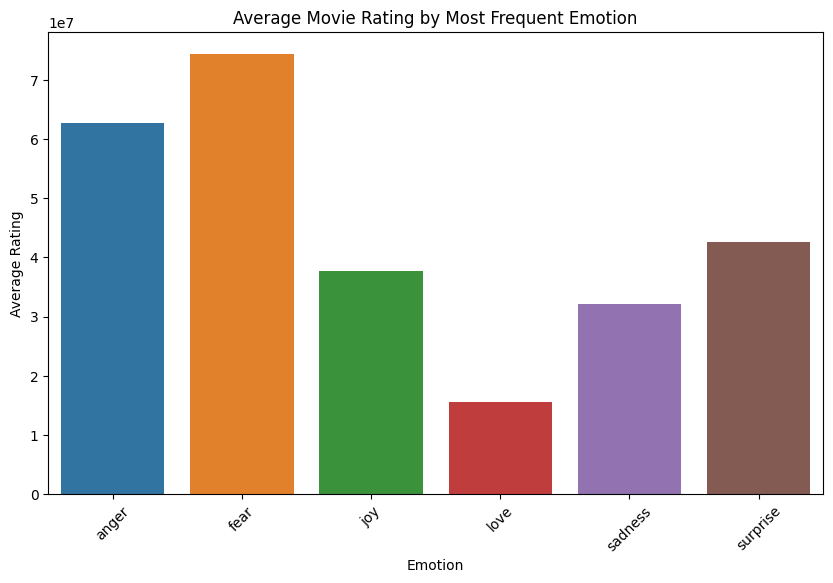

,anger,fear,joy,love,sadness,surprise
anger,0.000000,4.669237e-03,1.900114e-05,0.040011,0.001437,0.789000
fear,0.004669,0.000000e+00,9.848464e-09,0.016062,0.000039,0.690840
joy,0.000019,9.848464e-09,0.000000e+00,0.118575,0.372030,0.915839
love,0.040011,1.606163e-02,1.185753e-01,0.000000,0.086075,0.241219
sadness,0.001437,3.860515e-05,3.720302e-01,0.086075,0.000000,0.731855
surprise,0.789000,6.908396e-01,9.158392e-01,0.241219,0.731855,0.000000


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Assuming 'merged_df' is your merged DataFrame containing necessary columns

# Calculate average rating by emotion and sentiment
avg_rating_by_emotion = merged_df.groupby('most_frequent_emotion_x')['MovieBoxOfficeRevenue'].mean().reset_index()
avg_rating_by_sentiment = merged_df.groupby('overall_sentiment_y')['MovieBoxOfficeRevenue'].mean().reset_index()

# Perform t-tests and store results
# This is a simplified example; you might want to customize these comparisons
emotion_ttest_results = {}
for emotion1 in avg_rating_by_emotion['most_frequent_emotion_x']:
    for emotion2 in avg_rating_by_emotion['most_frequent_emotion_x']:
        if emotion1 != emotion2:
            group1 = merged_df[merged_df['most_frequent_emotion_x'] == emotion1]['MovieBoxOfficeRevenue']
            group2 = merged_df[merged_df['most_frequent_emotion_x'] == emotion2]['MovieBoxOfficeRevenue']
            t_stat, p_val = ttest_ind(group1, group2, nan_policy='omit')
            emotion_ttest_results[(emotion1, emotion2)] = p_val



# Plotting and annotating for emotions
plt.figure(figsize=(10, 6))
sns.barplot(x='most_frequent_emotion_x', y='MovieBoxOfficeRevenue', data=avg_rating_by_emotion)
plt.title('Average Movie Rating by Most Frequent Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)

plt.show()

emotions = sorted(set([pair[0] for pair in emotion_ttest_results.keys()]))

# Initialize a DataFrame with zeros
p_values_matrix = pd.DataFrame(0, index=emotions, columns=emotions)

# Populate the DataFrame with the p-values
for (emotion1, emotion2), p_val in emotion_ttest_results.items():
    p_values_matrix.at[emotion1, emotion2] = p_val

# Since each comparison is duplicated (anger-fear and fear-anger), we take the upper triangle of the matrix
for i in range(len(emotions)):
    for j in range(i+1, len(emotions)):
        emotion1, emotion2 = emotions[i], emotions[j]
        p_values_matrix.at[emotion2, emotion1] = p_values_matrix.at[emotion1, emotion2]

p_values_matrix


In [86]:
emotion_ttest_results

{('anger', 'fear'): 0.004669237164503348,
 ('anger', 'joy'): 1.9001139876495667e-05,
 ('anger', 'love'): 0.04001121643494188,
 ('anger', 'sadness'): 0.001437217427178384,
 ('anger', 'surprise'): 0.7890000747995134,
 ('fear', 'anger'): 0.004669237164503348,
 ('fear', 'joy'): 9.84846405797231e-09,
 ('fear', 'love'): 0.016061628401007663,
 ('fear', 'sadness'): 3.860514587211524e-05,
 ('fear', 'surprise'): 0.6908395954475426,
 ('joy', 'anger'): 1.9001139876495667e-05,
 ('joy', 'fear'): 9.84846405797231e-09,
 ('joy', 'love'): 0.11857532185827852,
 ('joy', 'sadness'): 0.3720301812320731,
 ('joy', 'surprise'): 0.9158391524755596,
 ('love', 'anger'): 0.04001121643494188,
 ('love', 'fear'): 0.016061628401007663,
 ('love', 'joy'): 0.11857532185827852,
 ('love', 'sadness'): 0.08607531039401363,
 ('love', 'surprise'): 0.24121925309858666,
 ('sadness', 'anger'): 0.001437217427178384,
 ('sadness', 'fear'): 3.860514587211524e-05,
 ('sadness', 'joy'): 0.3720301812320731,
 ('sadness', 'love'): 0.086075

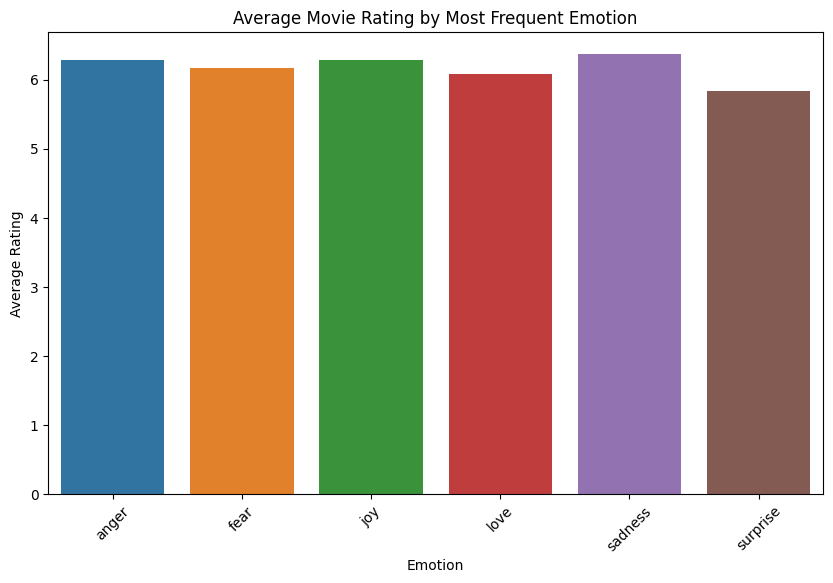

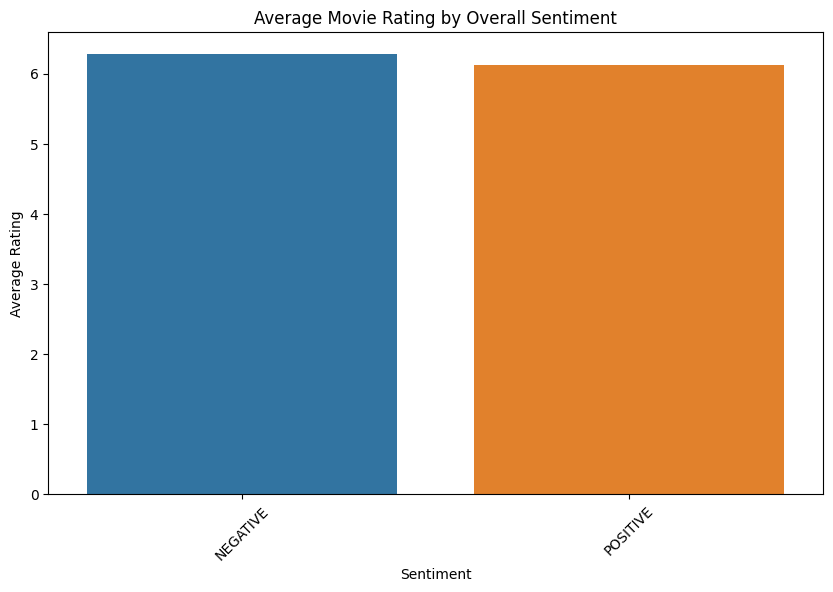

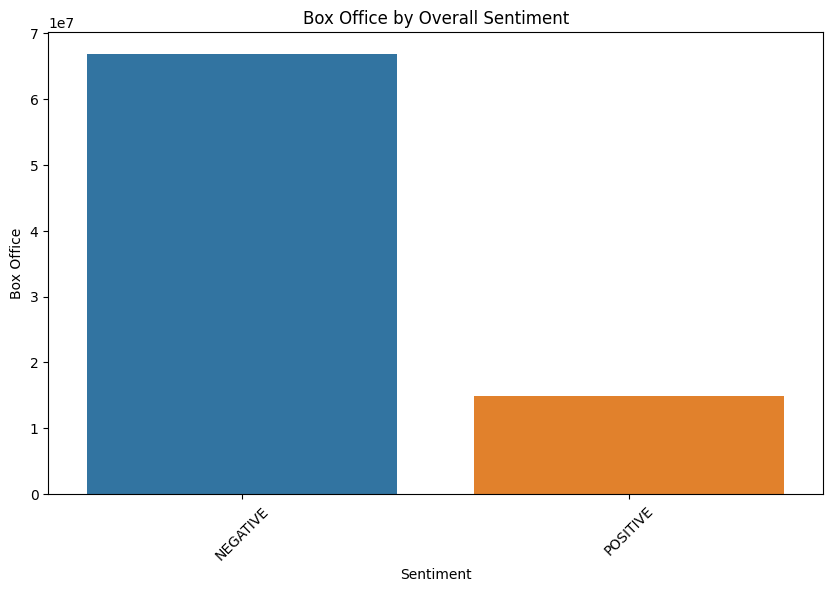

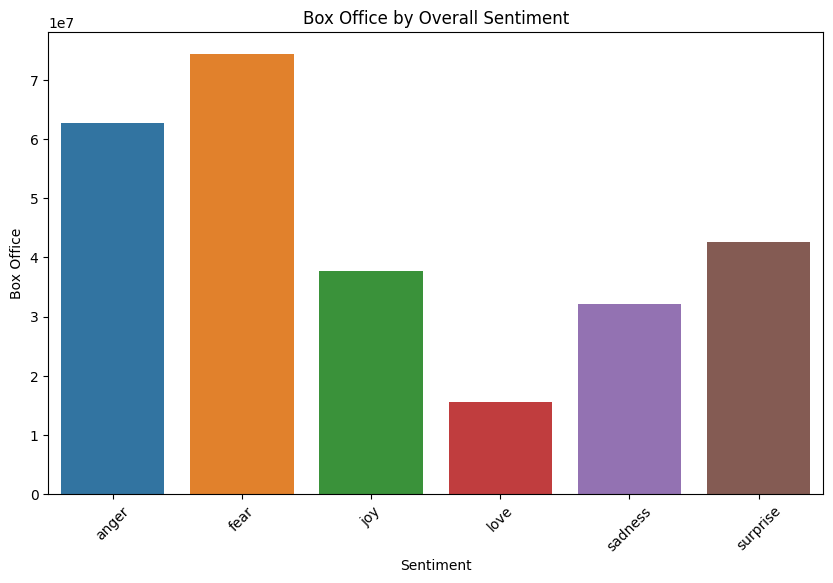

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

avg_rating_by_emotion = merged_df.groupby('most_frequent_emotion')['averageRating'].mean().reset_index()

# Calculate average rating by sentiment
avg_rating_by_sentiment = merged_df.groupby('overall_sentiment')['averageRating'].mean().reset_index()

avg_boxoffice_by_sentiment = merged_df.groupby('overall_sentiment')['MovieBoxOfficeRevenue'].mean().reset_index()

avg_boxoffice_by_emotion = merged_df.groupby('most_frequent_emotion')['MovieBoxOfficeRevenue'].mean().reset_index()

# Plotting average rating by emotion
plt.figure(figsize=(10, 6))
sns.barplot(x='most_frequent_emotion', y='averageRating', data=avg_rating_by_emotion)
plt.title('Average Movie Rating by Most Frequent Emotion')
plt.xlabel('Emotion')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Plotting average rating by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='overall_sentiment', y='averageRating', data=avg_rating_by_sentiment)
plt.title('Average Movie Rating by Overall Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Plotting average rating by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='overall_sentiment', y='MovieBoxOfficeRevenue', data=avg_boxoffice_by_sentiment)
plt.title('Box Office by Overall Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Box Office')
plt.xticks(rotation=45)
plt.show()

# Plotting average rating by sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x='most_frequent_emotion', y='MovieBoxOfficeRevenue', data=avg_boxoffice_by_emotion)
plt.title('Box Office by Overall Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Box Office')
plt.xticks(rotation=45)
plt.show()

In [100]:
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

emotion_colors = {
    'anger': '#E63946',  # Red
    'fear': '#F4A261',   # Sandy Brown
    'sadness': '#A8DADC', # Powder Blue
    'love': '#9C89B8',   # Muted Purple
    'surprise': '#F0C808',# Mustard
    'joy': '#2A9D8F'     # Teal
}

sentiment_colors = {
    'POSITIVE': '#264653', # Charcoal
    'NEGATIVE': '#6D6875'  # Muted Lavender
}


avg_rating_by_emotion = merged_df.groupby('most_frequent_emotion_x')['averageRating'].mean().reset_index()

avg_rating_by_sentiment = merged_df.groupby('overall_sentiment_x')['averageRating'].mean().reset_index()

avg_boxoffice_by_sentiment = merged_df.groupby('overall_sentiment_x')['MovieBoxOfficeRevenue'].mean().reset_index()

avg_boxoffice_by_emotion = merged_df.groupby('most_frequent_emotion_x')['MovieBoxOfficeRevenue'].mean().reset_index()

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('averageRating ~ C(most_frequent_emotion_x)', data=merged_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
display('ANOVA for averageRating ~ C(most_frequent_emotion_x):\n', anova_table)
model2 = ols('averageRating ~ C(overall_sentiment_x)', data=merged_df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)
display('ANOVA for averageRating ~ C(overall_sentiment_x):\n', anova_table2)

model3 = ols('MovieBoxOfficeRevenue ~ C(most_frequent_emotion_x)', data=merged_df).fit()
anova_table3 = sm.stats.anova_lm(model3, typ=2)
display('ANOVA for MovieBoxOfficeRevenue ~ C(most_frequent_emotion_x):\n', anova_table3)
model4 = ols('MovieBoxOfficeRevenue ~ C(overall_sentiment_x)', data=merged_df).fit()
anova_table4 = sm.stats.anova_lm(model4, typ=2)
display('ANOVA for MovieBoxOfficeRevenue ~ C(overall_sentiment_x):\n', anova_table4)

# Create a 2x2 subplot
fig = make_subplots(rows=2, cols=2, subplot_titles=('Average Movie Rating by Most Frequent Emotion',
                                                     'Average Movie Rating by Overall Sentiment',
                                                     'Box Office by Overall Sentiment',
                                                     'Box Office by Most Frequent Emotion'))

# Plot 1: Average Rating by Emotion
fig.add_trace(go.Bar(x=avg_rating_by_emotion['most_frequent_emotion_x'], 
                     y=avg_rating_by_emotion['averageRating'],
                     marker_color=[emotion_colors[emo] for emo in avg_rating_by_emotion['most_frequent_emotion_x']]), 
              row=1, col=1)

# Plot 2: Average Rating by Sentiment
fig.add_trace(go.Bar(x=avg_rating_by_sentiment['overall_sentiment_x'], 
                     y=avg_rating_by_sentiment['averageRating'],
                     marker_color=[sentiment_colors[sent] for sent in avg_rating_by_sentiment['overall_sentiment_x']]), 
              row=1, col=2)

# Plot 3: Box Office by Sentiment
fig.add_trace(go.Bar(x=avg_boxoffice_by_sentiment['overall_sentiment_x'], 
                     y=avg_boxoffice_by_sentiment['MovieBoxOfficeRevenue'],
                     marker_color=[sentiment_colors[sent] for sent in avg_boxoffice_by_sentiment['overall_sentiment_x']]), 
              row=2, col=2)

# Plot 4: Box Office by Emotion
fig.add_trace(go.Bar(x=avg_boxoffice_by_emotion['most_frequent_emotion_x'], 
                     y=avg_boxoffice_by_emotion['MovieBoxOfficeRevenue'],
                     marker_color=[emotion_colors[emo] for emo in avg_boxoffice_by_emotion['most_frequent_emotion_x']]), 
              row=2, col=1)

# Update layout
fig.update_layout(height=800, width=1000, title_text="Analysis by Emotion and Sentiment")
fig.show()


fig_json = fig.to_json()

with open('figures/boxoffice-ratings.json', 'w') as json_file:
    json.dump(json.loads(fig_json), json_file, indent=4)

'ANOVA for averageRating ~ C(most_frequent_emotion_x):\n'

,sum_sq,df,F,PR(>F)
C(most_frequent_emotion_x),51.615258,5.0,9.154392,1.042107e-08
Residual,16847.256880,14940.0,NaN,NaN


'ANOVA for averageRating ~ C(overall_sentiment_x):\n'

,sum_sq,df,F,PR(>F)
C(overall_sentiment_x),57.465145,1.0,50.990937,9.707295e-13
Residual,16841.406993,14944.0,NaN,NaN


'ANOVA for MovieBoxOfficeRevenue ~ C(most_frequent_emotion_x):\n'

,sum_sq,df,F,PR(>F)
C(most_frequent_emotion_x),7.790649e+17,5.0,9.765439,2.643743e-09
Residual,8.909581e+19,5584.0,NaN,NaN


'ANOVA for MovieBoxOfficeRevenue ~ C(overall_sentiment_x):\n'

,sum_sq,df,F,PR(>F)
C(overall_sentiment_x),1.215519e+18,1.0,76.611452,2.718192e-18
Residual,8.865935e+19,5588.0,NaN,NaN


In [78]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=merged_df['averageRating'], groups=merged_df['most_frequent_emotion_x'], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2  meandiff p-adj   lower  upper  reject
------------------------------------------------------
  anger     fear   -0.112    0.0  -0.172 -0.052   True
  anger      joy   0.0007    1.0 -0.0783 0.0796  False
  anger     love  -0.2014 0.1866  -0.449 0.0462  False
  anger  sadness   0.0934 0.2583   -0.03 0.2169  False
  anger surprise  -0.4361 0.3371 -1.0547 0.1826  False
   fear      joy   0.1126 0.0036  0.0247 0.2006   True
   fear     love  -0.0894 0.9125 -0.3401 0.1612  False
   fear  sadness   0.2054 0.0001   0.076 0.3349   True
   fear surprise  -0.3241 0.6707 -0.9439 0.2958  False
    joy     love  -0.2021 0.2146 -0.4579 0.0538  False
    joy  sadness   0.0928 0.4025 -0.0464  0.232  False
    joy surprise  -0.4367 0.3416 -1.0587 0.1853  False
   love  sadness   0.2948 0.0254   0.022 0.5677   True
   love surprise  -0.2346 0.9161 -0.8994 0.4301  False
sadness surprise  -0.5295 0.1567 -1.1587 0.0997  False
----------

In [79]:
chicken = pairwise_tukeyhsd(endog=merged_df['averageRating'], groups=merged_df['overall_sentiment_x'], alpha=0.05)
print(chicken)


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower   upper  reject
-------------------------------------------------------
NEGATIVE POSITIVE  -0.1625   0.0 -0.2071 -0.1179   True
-------------------------------------------------------


In [86]:
merged_df['MovieBoxOfficeRevenue']!= np.nan

TypeError: 'float' object is not callable

In [97]:
import numpy as np
df = merged_df[merged_df['MovieBoxOfficeRevenue'].notna()]

In [98]:
olive = pairwise_tukeyhsd(endog=df['MovieBoxOfficeRevenue'], groups=df['most_frequent_emotion_x'], alpha=0.05)
print(olive)


            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
 group1  group2     meandiff    p-adj       lower          upper      reject
----------------------------------------------------------------------------
  anger     fear  11605234.9469 0.0358     453706.6775  22756763.2163   True
  anger      joy  -25017935.649 0.0004  -41914760.2786  -8121111.0194   True
  anger     love -47275812.4469 0.2836 -111236318.4442  16684693.5505  False
  anger  sadness -30659966.7487 0.0166  -57860593.0192  -3459340.4782   True
  anger surprise -20120090.0406 0.9998 -228109987.5039 187869807.4227  False
   fear      joy -36623170.5959    0.0  -54840383.3911 -18405957.8006   True
   fear     love -58881047.3937  0.095 -123202975.9011   5440881.1136  False
   fear  sadness -42265201.6956 0.0003  -70305141.5845 -14225261.8067   True
   fear surprise -31725324.9875  0.998 -239826650.3227 176376000.3477  False
    joy     love -22257876.7979 0.9281  -87820492.5688   43304738.973  False

In [99]:
chicken = pairwise_tukeyhsd(endog=df['MovieBoxOfficeRevenue'], groups=df['overall_sentiment_x'], alpha=0.05)
print(chicken)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05            
 group1   group2     meandiff   p-adj     lower          upper      reject
--------------------------------------------------------------------------
NEGATIVE POSITIVE -51905351.047   0.0 -63530739.0336 -40279963.0603   True
--------------------------------------------------------------------------


In [101]:
import plotly.graph_objects as go
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data processing (replace with your actual data processing)
all_genres = []
# Replace merged_df with your actual DataFrame
for index, row in merged_df.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        all_genres.append({'Genre': genre, 'Emotion': row['overall_sentiment_x']})

flattened_df = pd.DataFrame(all_genres)

# Grouping and calculating the counts
sentiment_count = flattened_df.groupby(['Genre', 'Emotion']).size().unstack().fillna(0)

# Normalizing the counts to get proportions
proportions = sentiment_count.div(sentiment_count.sum(axis=1), axis=0)

# Creating the figure with stacked bars for proportions
fig = go.Figure(data=[
    go.Bar(name='Positive', x=proportions.index, y=proportions['POSITIVE']),
    go.Bar(name='Negative', x=proportions.index, y=proportions['NEGATIVE'])
])

# Updating layout for stacked barmode
fig.update_layout(barmode='stack', title='Sentiment Analysis by Individual Movie Genres')

# Display the figure
fig.show()

chi2, p, dof, expected = chi2_contingency(sentiment_count)

print(f"Chi-squared: {chi2}, p-value: {p}")

fig_json = fig.to_json()

with open('figures/genre-sentiment.json', 'w') as json_file:
    json.dump(json.loads(fig_json), json_file, indent=4)

Chi-squared: 671.2125962003889, p-value: 2.7889463608916785e-126


In [102]:
import plotly.graph_objects as go
import pandas as pd

# Sample data processing (replace with your actual data processing)
all_genres = []
# Replace merged_df with your actual DataFrame
for index, row in merged_df.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        all_genres.append({'Genre': genre, 'Emotion': row['most_frequent_emotion_x']})

flattened_df = pd.DataFrame(all_genres)

# Grouping and calculating the counts
sentiment_count = flattened_df.groupby(['Genre', 'Emotion']).size().unstack().fillna(0)

# Normalizing the counts to get proportions
proportions = sentiment_count.div(sentiment_count.sum(axis=1), axis=0)

# Creating the figure with stacked bars for proportions
fig = go.Figure(data=[
    go.Bar(name='anger', x=proportions.index, y=proportions['anger']),
    go.Bar(name='fear', x=proportions.index, y=proportions['fear']),
    go.Bar(name='sadness', x=proportions.index, y=proportions['sadness']),
    go.Bar(name='love', x=proportions.index, y=proportions['love']),
    go.Bar(name='surprise', x=proportions.index, y=proportions['surprise']),
    go.Bar(name='joy', x=proportions.index, y=proportions['joy'])
])

# Updating layout for stacked barmode
fig.update_layout(barmode='stack', title='Proportional Sentiment Analysis by Movie Genre')

# Display the figure
fig.show()

chi2, p, dof, expected = chi2_contingency(sentiment_count)

print(f"Chi-squared: {chi2}, p-value: {p}")

fig_json = fig.to_json()

with open('figures/genre-emotion.json', 'w') as json_file:
    json.dump(json.loads(fig_json), json_file, indent=4)

Chi-squared: 3618.737964593418, p-value: 0.0


In [35]:
import plotly.graph_objects as go
import pandas as pd

all_genres = []
for index, row in merged_df.iterrows():
    genres = row['genres'].split(',')
    for genre in genres:
        all_genres.append({'Genre': genre, 'Emotion': row['most_frequent_emotion_x']})

flattened_df = pd.DataFrame(all_genres)

sentiment_count = flattened_df.groupby(['Genre', 'Emotion']).size().unstack().fillna(0)

fig = go.Figure(data=[
    go.Bar(name='anger', x=sentiment_count.index, y=sentiment_count['anger']),
    go.Bar(name='fear', x=sentiment_count.index, y=sentiment_count['fear']),
    go.Bar(name='sadness', x=sentiment_count.index, y=sentiment_count['sadness']),
    go.Bar(name='love', x=sentiment_count.index, y=sentiment_count['love']),
    go.Bar(name='surprise', x=sentiment_count.index, y=sentiment_count['surprise']),
    go.Bar(name='joy', x=sentiment_count.index, y=sentiment_count['joy'])
])

fig.update_layout(barmode='group', title='Sentiment Analysis by Individual Movie Genres')

fig.show()

In [51]:
import pandas as pd
import plotly.express as px
from scipy.stats import chi2_contingency

fig = px.histogram(merged_df, x='MovieReleaseDate', color='most_frequent_emotion_x')
fig.show()

# Preparing data for chi-squared test
contingency_table = pd.crosstab(merged_df['MovieReleaseDate'], merged_df['most_frequent_emotion_x'])

# Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

Chi-squared: 810.0451222497707, p-value: 1.6294516820158354e-15


In [103]:
merged_df = merged_df[merged_df['MovieReleaseDate'] >= 1910]

merged_df['decade'] = (merged_df['MovieReleaseDate'] // 10) * 10

df_grouped = merged_df.groupby(['decade', 'most_frequent_emotion_x']).size().reset_index(name='count')

total_per_decade = merged_df.groupby(['decade']).size().reset_index(name='total')

df_merged = pd.merge(df_grouped, total_per_decade, on='decade')
df_merged['proportion'] = df_merged['count'] / df_merged['total']

fig = px.bar(df_merged, x='decade', y='proportion', color='most_frequent_emotion_x', barmode='stack')
fig.show()


contingency_table = pd.crosstab(df_merged['decade'], df_merged['most_frequent_emotion_x'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

fig_json = fig.to_json()

with open('figures/time-emotion.json', 'w') as json_file:
    json.dump(json.loads(fig_json), json_file, indent=4)

Chi-squared: 1.9393939393939394, p-value: 1.0


In [104]:

merged_df['decade'] = (merged_df['MovieReleaseDate'] // 10) * 10

df_grouped = merged_df.groupby(['decade', 'overall_sentiment_x']).size().reset_index(name='count')

total_per_decade = merged_df.groupby(['decade']).size().reset_index(name='total')

df_merged = pd.merge(df_grouped, total_per_decade, on='decade')
df_merged['proportion'] = df_merged['count'] / df_merged['total']

fig = px.bar(df_merged, x='decade', y='proportion', color='overall_sentiment_x', barmode='stack')
fig.show()

contingency_table = pd.crosstab(df_merged['decade'], df_merged['overall_sentiment_x'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared: {chi2}, p-value: {p}")

fig_json = fig.to_json()

with open('figures/time-sentiment.json', 'w') as json_file:
    json.dump(json.loads(fig_json), json_file, indent=4)

Chi-squared: 0.0, p-value: 1.0


In [118]:
import numpy as np
import pandas as pd
df = pd.read_csv("dataset/embeddings.csv")
df['embeddings'] = df['embeddings'].apply(lambda x: np.fromstring(x, dtype=float, sep=','))

In [119]:
war_movies = df[df['genres'].str.contains('war', case=False, na=False)]

In [ ]:
from transformers import BertModel, BertTokenizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import torch
import spacy

# Load pre-trained BERT model & tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()  # Set the model to evaluation mode
# Load the English tokenizer, tagger, parser, NER, and word vectors

nlp = spacy.load("en_core_web_sm")

# Custom function to filter out verbs and custom stop words
custom_stop_words = {'war', 'soldier', 'military', 'army', 'film', 'army', 'battle', 'combat', 'conflict', 'officer', 'captain', 'killed'}
def filter_verbs_and_custom_stopwords(text):
    doc = nlp(text)
    filtered_text = ' '.join(token.text for token in doc if token.pos_ != 'VERB' and token.text.lower() not in custom_stop_words)
    return filtered_text

# Apply the function to preprocess the texts
war_movies['PlotSummaries'] = [filter_verbs_and_custom_stopwords(text) for text in war_movies.PlotSummaries]
# Function to handle long texts by splitting into chunks
def get_bert_embeddings(text, chunk_size=512):
    # Tokenize input text
    tokens = tokenizer.tokenize(text)
    # Initialize an empty array to store embeddings
    all_embeddings = []
    # Process text in chunks
    for i in range(0, len(tokens), chunk_size-2):  # subtract 2 for [CLS] and [SEP] tokens
        # Prepare tokens for input to BERT
        chunk_tokens = tokens[i:i+chunk_size-2]
        chunk_tokens = ['[CLS]'] + chunk_tokens + ['[SEP]']
        chunk_ids = tokenizer.convert_tokens_to_ids(chunk_tokens)
        chunk_ids_tensor = torch.tensor([chunk_ids]).to('cuda' if torch.cuda.is_available() else 'cpu')

        # Get BERT embeddings for the chunk
        with torch.no_grad():
            chunk_embeddings = model(chunk_ids_tensor).last_hidden_state[:, 0, :].squeeze().cpu().numpy()
        all_embeddings.append(chunk_embeddings)

    # Aggregate the embeddings by averaging
    embeddings = np.mean(all_embeddings, axis=0)
    return embeddings

# Apply the function to your dataset
war_movies['bert_embeddings'] = war_movies['PlotSummaries'].apply(get_bert_embeddings)

# Dimensionality Reduction
pca = PCA(n_components=0.95)  # retain 95% variance
X_reduced = pca.fit_transform(list(war_movies['bert_embeddings']))

# Clustering
kmeans = KMeans(n_clusters=5)
war_movies['topic'] = kmeans.fit_predict(X_reduced)



In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from nltk.corpus import stopwords
import spacy
"""
custom_stop_words = {'war', 'soldier', 'military', 'army', 'film', 'army', 'battle', 'combat', 'conflict', 'officer', 'captain', 'killed', 'will', 'love'}
def filter_verbs_and_custom_stopwords(text):
    doc = nlp(text)
    filtered_text = ' '.join(token.text for token in doc if token.pos_ != 'VERB' and token.text.lower() not in custom_stop_words)
    return filtered_text

processed_texts = [filter_verbs_and_custom_stopwords(text) for text in war_movies.PlotSummaries]


tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(processed_texts)
"""

embeddings_list = war_movies['embeddings'].tolist()  # Convert to list of arrays
embeddings_array = np.vstack(embeddings_list)  # Stack to create a 2D array

# Now you can fit KMeans with this array
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings_array)
clusters = kmeans.labels_


# Analyze the clusters
for cluster in range(n_clusters):
    cluster_texts = [processed_texts[i] for i in range(len(processed_texts)) if clusters[i] == cluster]
    cluster_features = tfidf[clusters == cluster]

    words_freq = cluster_features.sum(axis=0)
    words = [(word, words_freq[0, idx]) for word, idx in tfidf_vectorizer.vocabulary_.items()]
    top_words = sorted(words, key=lambda x: x[1], reverse=True)[:10]
    top_words = [word for word in top_words if word[0] not in custom_stop_words]

    print(f"Cluster {cluster}:")
    for word, score in top_words:
        print(f"{word}, {score}")

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(cluster_texts))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.show()

NameError: name 'processed_texts' is not defined

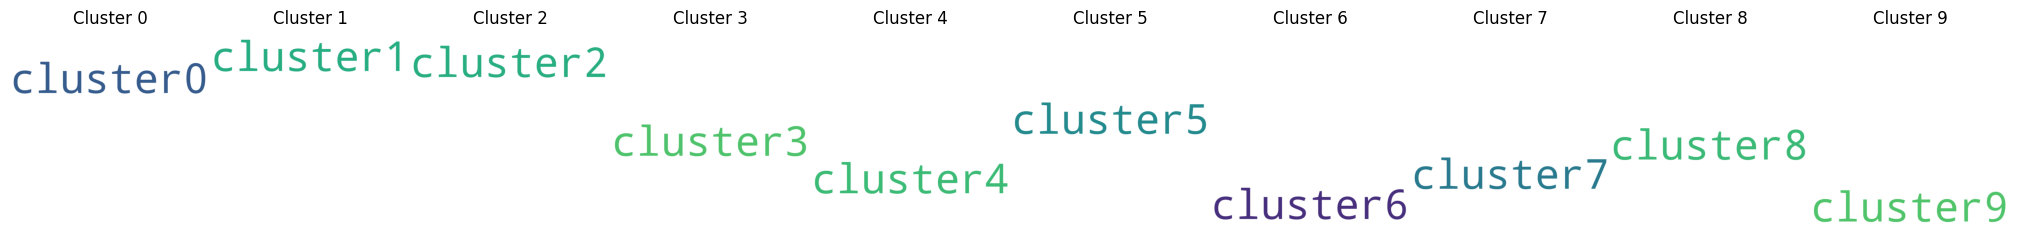

In [126]:
embeddings_list = war_movies['embeddings'].tolist()  # Convert to list of arrays
embeddings_array = np.vstack(embeddings_list) 
# Clustering with KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(embeddings_array)
clusters = kmeans.labels_

# Create a word cloud for each cluster
cluster_wordclouds = []
for i in range(n_clusters):
    # Generate a simple text representation of each cluster
    # Words are the cluster number, repeated according to the number of items in that cluster
    cluster_text = ("cluster" + str(i) + " ") * list(clusters).count(i)
    
    # Generate word cloud
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(cluster_text)
    
    # Store the word cloud
    cluster_wordclouds.append(wordcloud)

# Display the word clouds
fig, axes = plt.subplots(1, n_clusters, figsize=(20, 10))
for i, wordcloud in enumerate(cluster_wordclouds):
    axes[i].imshow(wordcloud)
    axes[i].axis("off")
    axes[i].set_title(f"Cluster {i}")

plt.tight_layout(pad=0)
plt.show()

In [148]:
merged_df[merged_df.IMDbID == "tt0174143"]

,IMDbID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,PlotSummaries,averageRating,genres,Category,overall_sentiment,most_frequent_emotion
902,tt0174143,Forbidden Priests,1973,NaN,90.0,French,France,This French melodrama tells the tragic story o...,5.2,"Drama,Romance,War",Socio-Political,POSITIVE,sadness


In [149]:
war_movies_0 = war_movies[clusters == 1]
war_movies_0

,IMDbID,MovieName,MovieReleaseDate,MovieBoxOfficeRevenue,MovieRuntime,MovieLanguages,MovieCountries,PlotSummaries,averageRating,genres,Category,embeddings
67,tt0017850,The Enemy,1927,NaN,90.0,Silent film,United States of America,Newlywed Carl goes to war where he endures ma...,7.5,"Drama,Romance,War",Socio-Political,"[-0.06850576, 0.009221755, -0.05919551, 0.0271..."
168,tt0325123,Bright Young Things,2003,NaN,104.0,English,United Kingdom,The primary characters are earnest aspiring no...,6.5,"Comedy,Drama,War",Socio-Political,"[0.0011909939, -0.036860093, 0.02399715, 0.015..."
269,tt0049474,The Man in the Gray Flannel Suit,1956,4350000.0,153.0,English,United States of America,Tom and Betsy Rath live in a rundown house in...,7.1,"Drama,Romance,War",Socio-Political,"[-0.033877663, -0.044522163, 0.01872834, -0.10..."
389,tt0032612,The Howards of Virginia,1940,NaN,115.0,English,United States of America,{{Expand section}} Against the backdrop of the...,6.0,"Drama,History,War",Socio-Political,"[0.02029365, 0.050358366, -0.0035232264, 0.021..."
479,tt1382250,The Heart of No Place,2009,NaN,85.0,None,NaN,Rock widow Y. tries to come to terms with the ...,8.4,"Drama,Music,War",Socio-Political,"[-0.075372234, 0.02965705, 0.1003372, -0.05133..."
...,...,...,...,...,...,...,...,...,...,...,...,...
14323,tt0099747,Havana,1990,9243140.0,140.0,None,United States of America,The film is set on the Eve of the victory of t...,6.1,"Drama,Romance,War",Socio-Political,"[-0.07782348, 0.013605127, -0.091702476, 0.076..."
14336,tt0034583,Casablanca,1942,3700000.0,102.0,French,United States of America,Cynical American expatriate Rick Blaine is th...,8.5,"Drama,Romance,War",Socio-Political,"[-0.080638245, -0.046392098, -0.03631576, -0.0..."
14379,tt0087284,Fort Saganne,1984,NaN,103.0,French,France,"In 1911, a willful and determined man from pea...",6.3,"Drama,History,War",Socio-Political,"[-0.042069014, 0.05297102, -0.0005725449, 0.03..."
14555,tt0051141,Until They Sail,1957,1300000.0,94.0,English,United States of America,"The film opens in a Wellington courtroom, wher...",6.5,"Drama,Romance,War",Socio-Political,"[-0.06555497, -0.027977148, 0.0052520125, 0.01..."


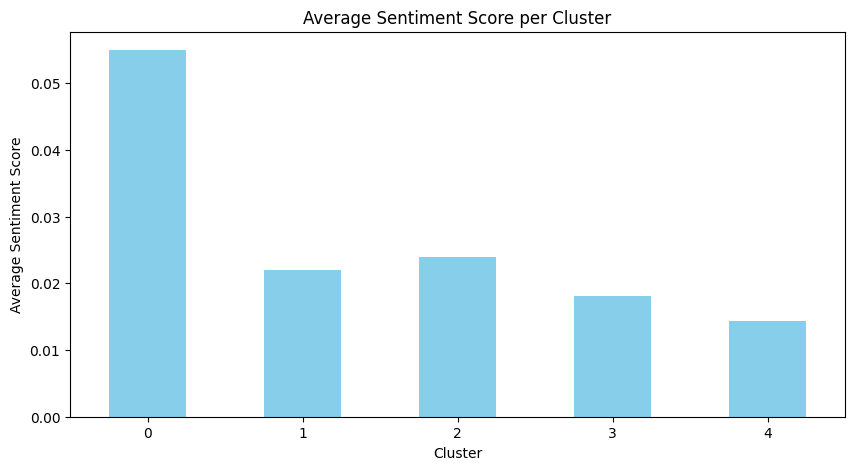

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame that includes 'sentiment_score' and 'cluster_label' columns
# Calculate the average sentiment for each cluster
average_sentiment_per_cluster = war_movies.groupby('topic')['sentiment_score'].mean()

# Plotting the results
plt.figure(figsize=(10, 5))
average_sentiment_per_cluster.plot(kind='bar', color='skyblue')
plt.title('Average Sentiment Score per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=0)
plt.show()